Expected Value vs. CVaR Comparison

Mauricio Tombini, Jordan Jalving, and Victor M. Zavala 

University of Wisconsin-Madison, 2016

In [18]:
# Loading packages:
using JuMP 
using Distributions 
using Ipopt
using PyPlot

In [19]:
# Generate random data: 
NS = 100
S = collect(1:NS); 
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,NS);

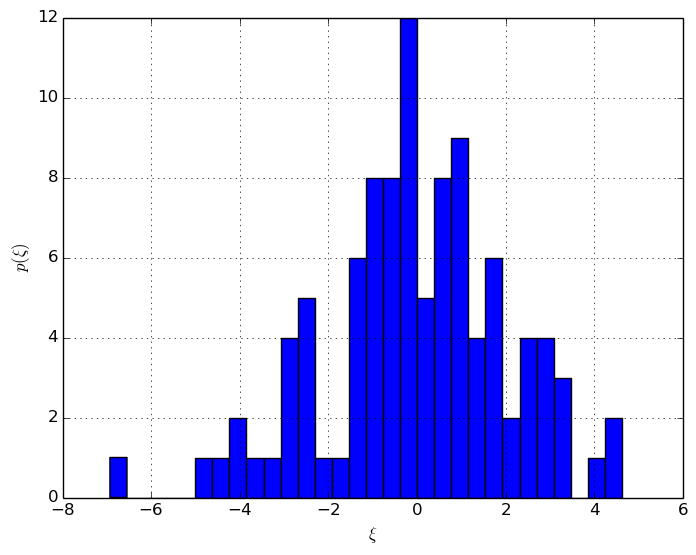

PyObject <matplotlib.text.Text object at 0x7fc077fdd810>

In [20]:
# Plotting data
plt[:hist](R, bins = 30);
grid("on")
xlabel(L"\xi")
ylabel(L"p(\xi)")

## Solve expected value problem

In [21]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)            # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 
@objective(m, Min, (1/NS)*sum(cost[s] for s in S))

solve(m)
solcost = getvalue(cost);
println("x=",getvalue(x))
println("mean=",getobjectivevalue(m))
println("meanR=",(1/NS)*sum(R))

x=-0.049640963099936354
mean=4.41838656225072
meanR=-0.04964096309993612


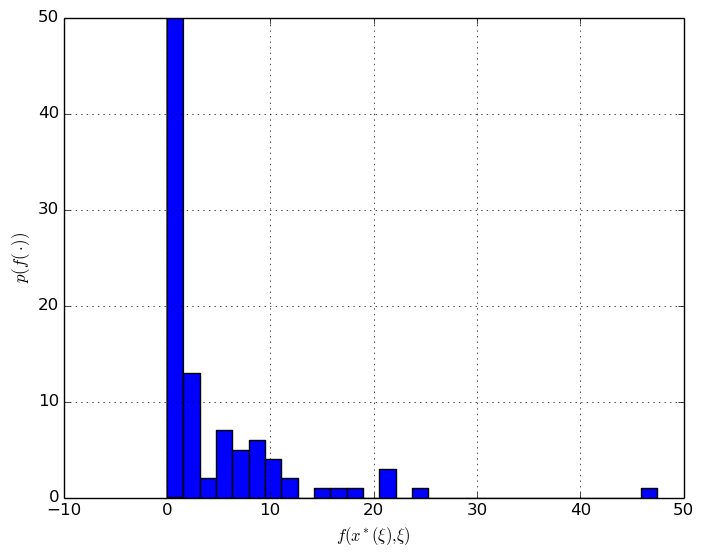

PyObject <matplotlib.text.Text object at 0x7fc0781c0490>

In [22]:
# Plotting cost fistribution 
plt[:hist](solcost,bins = 30)
grid("on")
axis([-10, 50, 0, 50])
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")

## Solve CVaR Problem

In [23]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)              # decision variable
@variable(m, cost[1:NS])     # per scenario cost
@variable(m, VaR)            # cvar auxiliary variable
@variable(m, phi[S] >= 0)    # cvar auxiliary variable
alpha = 0.0001;              # cvar probability level

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 
@constraint(m, cvar[s in S], cost[s]-VaR <= phi[s])
@objective(m, Min, VaR + (1/NS)*sum((1/alpha)*phi[s] for s in S))

solve(m)
solcost2 = getvalue(cost);
println("x=",getvalue(x))
println("CVaR=",getobjectivevalue(m))
println("mean=",(1/NS)*sum(solcost2))

x=-1.153574009577105
CVaR=33.42170024257977
mean=5.637054734120719


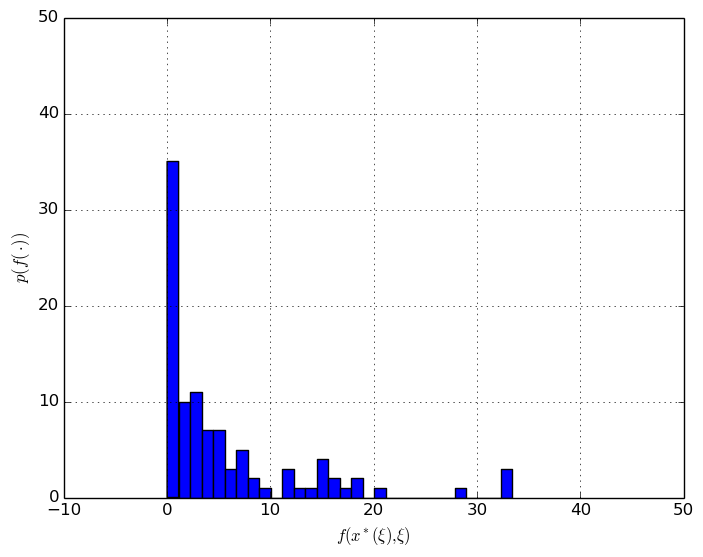

PyObject <matplotlib.text.Text object at 0x7fc077f0c6d0>

In [24]:
# Plotting cost distribution 
plt[:hist](solcost2,bins = 30)
grid("on")
axis([-10, 50, 0, 50])
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")